# MNIST Digits Classification with Multi-Layer-Perceptron

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Parameter Settings

In [3]:
batch_size = 128
num_classes = 10
epochs = 20

### Split Data into Training and Test Set

In [4]:
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


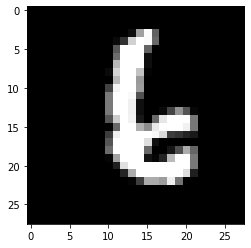

Digit : 0


In [5]:
ind = 7434
sample_image = x_train[ind] 
pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print('Digit :',np.argmax(y_train[ind]))


### Preprocess Input Images

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


60000 train samples
10000 test samples


In [7]:
x_train.shape

(60000, 784)

In [8]:
x_train[0,:].shape

(784,)

In [9]:
y_train.shape

(60000, 10)

### Build the ANN with Sequential Model

**A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.**

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Train the Model

In [11]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2446 - accuracy: 0.9258 - val_loss: 0.1190 - val_accuracy: 0.9622
Epoch 2/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1008 - accuracy: 0.9694 - val_loss: 0.0950 - val_accuracy: 0.9698
Epoch 3/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0755 - accuracy: 0.9774 - val_loss: 0.0805 - val_accuracy: 0.9772
Epoch 4/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.0818 - val_accuracy: 0.9782
Epoch 5/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0484 - accuracy: 0.9854 - val_loss: 0.0772 - val_accuracy: 0.9792
Epoch 6/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 0.0704 - val_accuracy: 0.9815
Epoch 7/20
60000/60000 [==============================] - 7s 1

### Plot the History of Accuracy and Loss
Plot the history of the model suring training. How te accuracy changes over time. How the profile of the loss funcrtion changes over the number of training iterations.

In [12]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

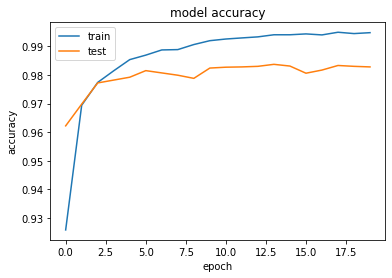

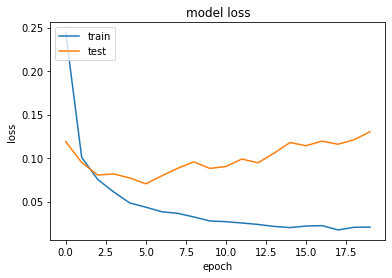

In [13]:
import matplotlib.pyplot as plt

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize History for the Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Make Prediction

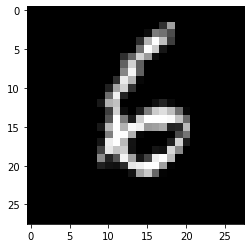

 Real label : 6
 Predicted label: 6


In [14]:
predicted = model.predict(x_test)

ind = 2000
sample_image = x_test[ind]

pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted[ind]))

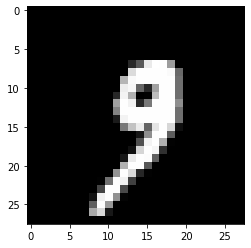

 Real label : 9
 Predicted label: 9


In [15]:
predicted = model.predict(x_test)

ind = 1000
sample_image = x_test[ind]

pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted[ind]))

### Evaluate on Test Set

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1302659359118847
Test accuracy: 0.9828000068664551


# Model Persistence
## Saving and Loading Model to/from Disk

### Save the Model

In [17]:
model_json = model.to_json()

In [18]:
# Save the model architecture
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print(' Saved model architecture successfully...')    

 Saved model architecture successfully...


In [19]:
# Save the trained weights abd biases
model.save_weights("model.h5")
print(' Saved model weights successfully...')    

 Saved model weights successfully...


# Later on......

### Load the Model - Architecture

In [20]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
print('\n Model loaded successfully.....')


 Model loaded successfully.....


### Initialize the Model with Pretrained Weights

In [21]:
# Initialize weights
loaded_model.load_weights("model.h5")
print('\n Weights initialized.....')


 Weights initialized.....


### Verify the Model Architecture

In [22]:
# Compile and see the model summary
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Make Prediction

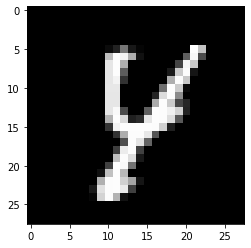

 Real label : 4
 Predicted label: 4


In [23]:
predicted = loaded_model.predict(x_test)

ind = 1024
sample_image = x_test[ind]

pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted[ind]))